<table width='100%' >
    <tr>
        <td><img src='ucd1.png' width='120'></td>
        <td><img src='dept_inf1.png' width='350'></td>
        <td><img src='fs1.png' width='120'></td>
    </tr>
</table>

# <center>TP : Validation Croisée</center>




## Objectif : Utiliser la validation croisée pour évaluer un modèle de classification 

Comme il est deja explique dans notre présentation la validation croisée est une méthode efficace pour évaluer la capacité d'un modèle à généraliser sur des données non vues afin de détecter le surapprentissage.

Dans ce Tp, nous allons démontrer comment utiliser cette validation croisée pour évaluer un modèle de classification en utilisant la validation croisée K-Folds. Nous choisirons spécifiquement d'utiliser la méthode K-Folds, qui divise les données en k sous-ensembles (folds) pour entraîner et évaluer le modèle k fois avec différents sous-ensembles.

Tout d'abord, nous allons charger le dataset qui contient des informations médicales  des patients qu'on va utiliser pour la classification afin de prédire si un patient a plus ou moins de chances d'avoir une attaque cardiaque en fonction de ces facteurs,sachant que :
- `output` : Variable cible.
  - 0 : Moins de chance d'attaque cardiaque.
  - 1 : Plus de chance d'attaque cardiaque.


In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape

(303, 14)

Nous définissons deux variables, `X` et `y`, correspondant respectivement à l'entrée et à la sortie.

In [3]:
features = []
for column in df.columns:
    if column != 'output':
        features.append(column)
X = df[features]
y = df['output']

## Construire et tester le modèle

Dans les tps qu'on a fait dans les seances du cours , nous divisons généralement `X` et `y` en ensembles d'entraînement et de test à l'aide de la fonction `train_test_split()` de `scikit-learn`. Cela nous permet d'entraîner le modèle sur l'ensemble d'entraînement et de le tester sur l'ensemble de test pour évaluer ses performances. Cependant, cette approche ne nous permet pas de vérifier efficacement si le modèle est surajusté ou non.

Pour ce TP, nous allons changer notre approche en utilisant la validation croisée K-Folds.

K-Folds divise le dataset en k sous-ensembles, entraîne le modèle k fois sur différents ensembles d'entraînement et le teste k fois sur différents ensembles de test. Chaque fois, l'ensemble d'entraînement est constitué de k-1 sous-ensembles, tandis que l'ensemble de test est le sous-ensemble restant.

La bibliothèque `scikit-learn` fournit une classe pour K-Folds, appelée `KFold()`, où nous spécifions le nombre `k`. Pour chaque paire d'ensembles d'entraînement et de test générée par K-Folds, nous construisons le modèle et calculons l'erreur absolue moyenne (Mean Absolute Error - MAE) à la fois pour les ensembles d'entraînement et de test. Dans cet exemple spécifique, nous utiliserons le `KNeighborsClassifier()`.

Nous allons regrouper toutes ces opérations dans une fonction nommée `test_model()`, qui prend en entrée le modèle et les variables `X` et `y`.



In [4]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score


def test_model(model, X, y):
    kf = KFold(n_splits=4)
    mae_train = []
    mae_test = []
    accuracy_train = []
    accuracy_test = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
    folds = range(1, kf.get_n_splits() + 1)
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='Train MAE')
    plt.plot(folds, mae_test, 'o-', color='red', label='Test MAE')
    plt.legend()
    plt.grid()
    plt.xlabel('Fold')
    plt.ylabel('Mean Absolute Error')
    
    plt.subplot(1, 2, 2)
    plt.plot(folds, accuracy_train, 'o-', color='green', label='Train Accuracy')
    plt.plot(folds, accuracy_test, 'o-', color='red', label='Test Accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    
    plt.show()
    
    print('Mean Absolute Error - Train:', mae_train)
    print('Mean Absolute Error - Test:', mae_test)
    print('Accuracy - Train:', accuracy_train)
    print('Accuracy - Test:', accuracy_test)

## K-Nearest Neighbors

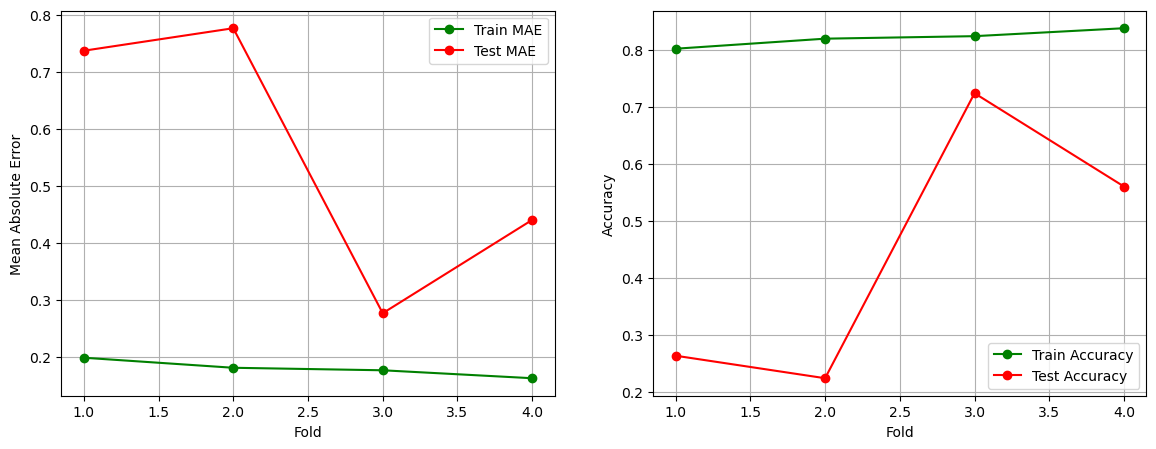

Mean Absolute Error - Train: [0.19823788546255505, 0.18061674008810572, 0.1762114537444934, 0.16228070175438597]
Mean Absolute Error - Test: [0.7368421052631579, 0.7763157894736842, 0.27631578947368424, 0.44]
Accuracy - Train: [0.801762114537445, 0.8193832599118943, 0.8237885462555066, 0.8377192982456141]
Accuracy - Test: [0.2631578947368421, 0.2236842105263158, 0.7236842105263158, 0.56]


In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
test_model(model, X,y)



### Analyse des Résultats

#### Mean Absolute Error (MAE) :

- **Train MAE :** Les valeurs de MAE pour l'entraînement sont assez faibles, allant de 0.16 à 0.20. Cela indique que le modèle fait peu d'erreurs sur les données d'entraînement.
- **Test MAE :** Les valeurs de MAE pour le test sont beaucoup plus élevées, allant de 0.28 à 0.78. donc il ya une différence importante entre l'erreur sur l'ensemble d'entraînement et celle sur l'ensemble de test.
#### Accuracy :

- **Train Accuracy :** Les valeurs d'accuracy pour l'entraînement sont élevées, entre 0.80 et 0.84, indiquant que le modèle a bien appris les données d'entraînement.
- **Test Accuracy :** Les valeurs d'accuracy pour le test sont beaucoup plus basses, variant de 0.22 à 0.72. on remarque également une différence importante entre l'accuracy sur l'ensemble d'entraînement et celle sur l'ensemble de test .

---

### Conclusion: 

On peut très clairement déduire que une faible erreur d'entraînement et une erreur de test beaucoup plus élevée indiquent que le modèle a appris les spécificités des données d'entraînement, mais qu'il ne généralise pas bien sur des données non vues. De même, une accuracy d'entraînement élevée et une accuracy de test beaucoup plus faible suggèrent que le modèle performe bien sur les données d'entraînement mais échoue à bien prédire sur des nouvelles données. Ces observations indiquent un cas de surapprentissage, où le modèle a appris à ajuster ses prédictions de manière trop spécifique aux données d'entraînement, au détriment de sa capacité à généraliser sur de nouvelles données.



## Limiter le surapprentissage

Pour limiter le surapprentissage, nous allons essayer plusieurs méthodes :

* Réduire la complexité du modèle
* Ajuster les paramètres du modèle
* Changer de modèle si nécessaire

### 1. Réduire la complexité du modèle

Comme première tentative pour améliorer le modèle, nous allons normaliser toutes les caractéristiques d'entrée dans une plage comprise entre 0 et 1 en utilisant `MinMaxScaler()`.

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6280\2796116140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6280\2796116140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6280\2796116140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Nous construisons un nouveau modèle et nous appelons la fonction `test_model()` . Bien que les performances du modèle s'améliorent à la fois sur les ensembles d'entraînement et de test, la MAE de test reste encore élevée. Cela suggère que le modèle est toujours sujet au surajustement.

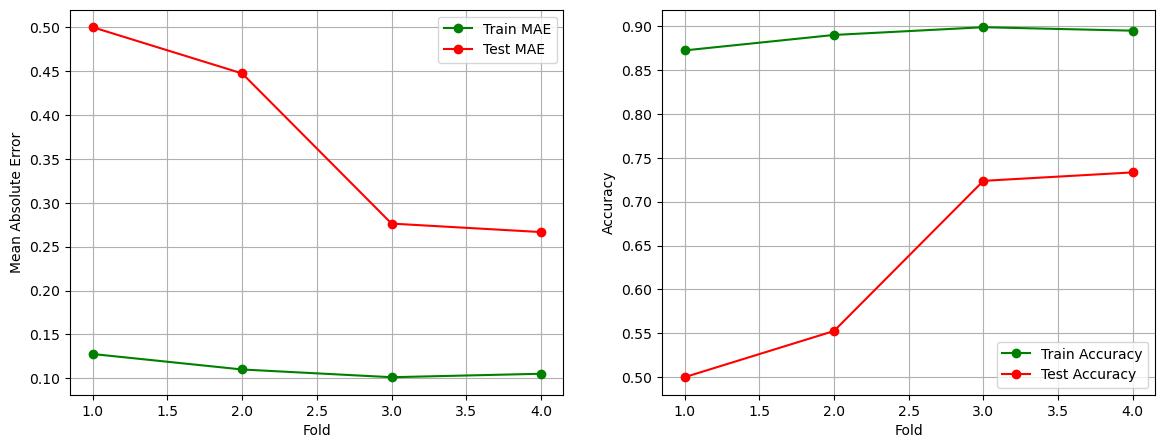

Mean Absolute Error - Train: [0.1277533039647577, 0.11013215859030837, 0.1013215859030837, 0.10526315789473684]
Mean Absolute Error - Test: [0.5, 0.4473684210526316, 0.27631578947368424, 0.26666666666666666]
Accuracy - Train: [0.8722466960352423, 0.8898678414096917, 0.8986784140969163, 0.8947368421052632]
Accuracy - Test: [0.5, 0.5526315789473685, 0.7236842105263158, 0.7333333333333333]


In [7]:
model = KNeighborsClassifier(n_neighbors=2)
test_model(model, X,y)

Après avoir testé le modèle sur les nouvelles caractéristiques :

- **Test MAE :** Les valeurs de MAE pour le test ont diminué, passant de 0.45 à environ 0.32 en moyenne.
- **Test Accuracy :** Les valeurs d'accuracy pour le test ont également augmenté, passant de 0.55 à environ 0.62 en moyenne.

On remarque que les performances du modèle s'améliorent un peu. Cependant, le modèle est toujours en surapprentissage.

### 2. Ajuster les paramètres

Une autre possibilité pourrait être d'ajuster les paramètres de l'algorithme. La bibliothèque `scikit-learn` fournit la classe `GridSearchCV()`, qui permet de rechercher les meilleurs paramètres d'un modèle spécifique. Les paramètres à ajuster doivent être passés sous forme de dictionnaire où pour chaque paramètre, la liste des valeurs à analyser doit être spécifiée. De plus, `GridSearchCV()` utilise également la validation croisée. Le meilleur estimateur est disponible après l'ajustement, dans la variable `best_estimator_`.

In [8]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

param_grid = {
   'n_neighbors': np.arange(1,30),
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean','manhattan','chebyshev','minkowski']
}

grid = GridSearchCV(model, param_grid = param_grid, cv=4)
grid.fit(X, y)
best_estimator = grid.best_estimator_
best_estimator

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

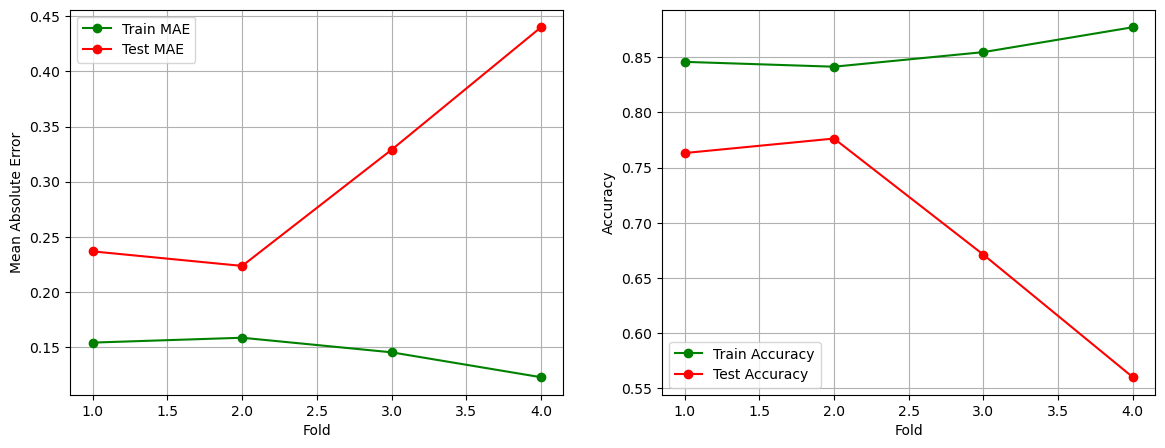

Mean Absolute Error - Train: [0.15418502202643172, 0.15859030837004406, 0.14537444933920704, 0.12280701754385964]
Mean Absolute Error - Test: [0.23684210526315788, 0.2236842105263158, 0.32894736842105265, 0.44]
Accuracy - Train: [0.8458149779735683, 0.8414096916299559, 0.8546255506607929, 0.8771929824561403]
Accuracy - Test: [0.7631578947368421, 0.7763157894736842, 0.6710526315789473, 0.56]


In [9]:
test_model(best_estimator, X,y)

Ces résultats montrent que le modèle a des performances légèrement meilleures par rapport aux tests précédents, avec une diminution de l'erreur absolue moyenne (MAE) sur les données d'entraînement et des variations dans les performances sur les données de test.

## 3. Changement de modèle

Malgré nos efforts précédents pour atténuer le surajustement, les performances du modèle restent insatisfaisantes. Ainsi, nous avons décidé d'explorer de nouveaux modèles.

### LogisticRegression

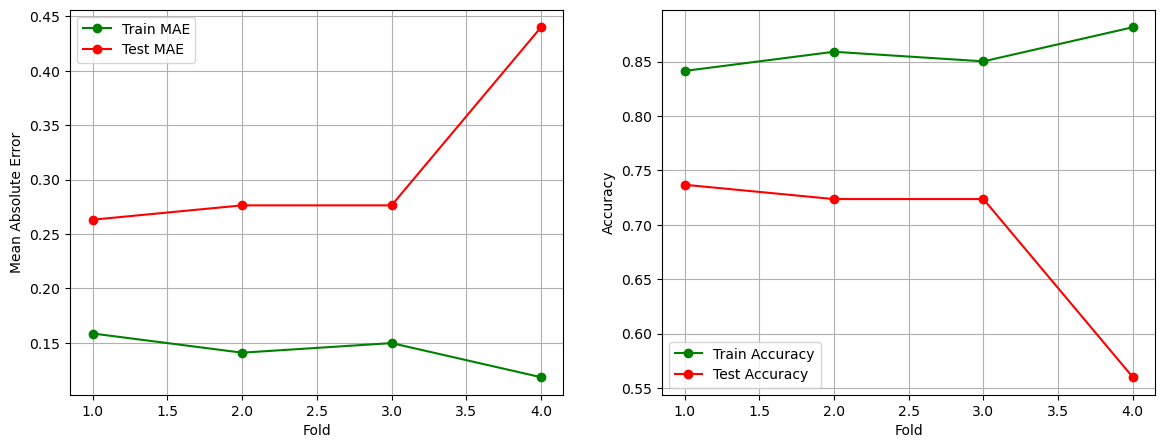

Mean Absolute Error - Train: [0.15859030837004406, 0.14096916299559473, 0.14977973568281938, 0.11842105263157894]
Mean Absolute Error - Test: [0.2631578947368421, 0.27631578947368424, 0.27631578947368424, 0.44]
Accuracy - Train: [0.8414096916299559, 0.8590308370044053, 0.8502202643171806, 0.881578947368421]
Accuracy - Test: [0.7368421052631579, 0.7236842105263158, 0.7236842105263158, 0.56]


In [10]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression(max_iter=1000)
test_model(model_log_reg, X, y)

le modèle présente toujours des signes de surapprentissage avec une différence notable entre les performances sur les données d'entraînement et celles sur les données de test, cherchons un autre modele donc !.

### SVM (Support Vector Machine) 

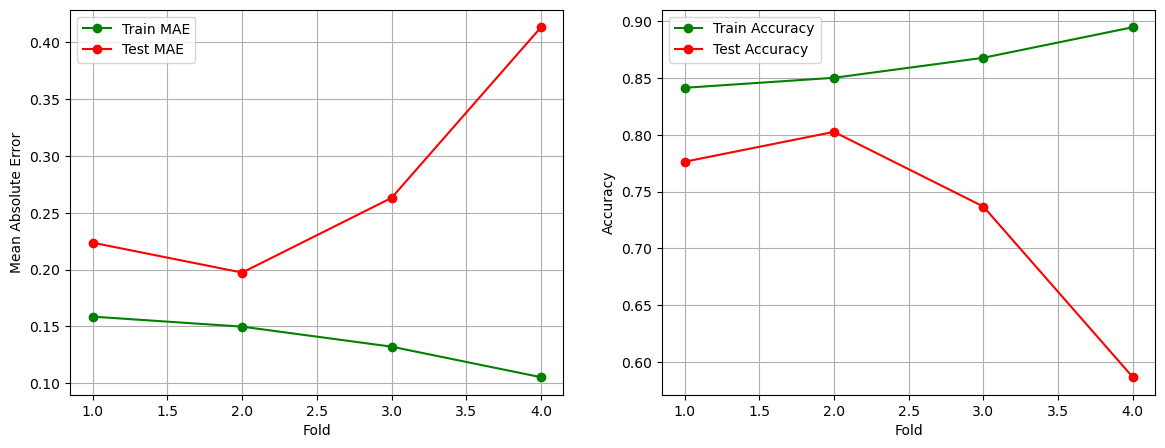

Mean Absolute Error - Train: [0.15859030837004406, 0.14977973568281938, 0.13215859030837004, 0.10526315789473684]
Mean Absolute Error - Test: [0.2236842105263158, 0.19736842105263158, 0.2631578947368421, 0.41333333333333333]
Accuracy - Train: [0.8414096916299559, 0.8502202643171806, 0.8678414096916299, 0.8947368421052632]
Accuracy - Test: [0.7763157894736842, 0.8026315789473685, 0.7368421052631579, 0.5866666666666667]


In [11]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=3)
test_model(model_svm, X, y)


Après avoir testé le modèle avec ces nouvelles modifications :

- **Test MAE :** Les valeurs de MAE pour le test ont varié entre 0.22 et 0.41.
- **Test Accuracy :** Les valeurs d'accuracy pour le test ont varié entre 0.59 et 0.80.

Malgré ces ajustements, le modèle continue de montrer des signes de surapprentissage.

Comme vous pouvez remarquer les améliorations n'ont pas été significatives et le MAE de test varie de 0,23 à 0,42.
Pour cette raison, nous avons choisi d'explorer le modele GaussianNB()

## GaussianNB

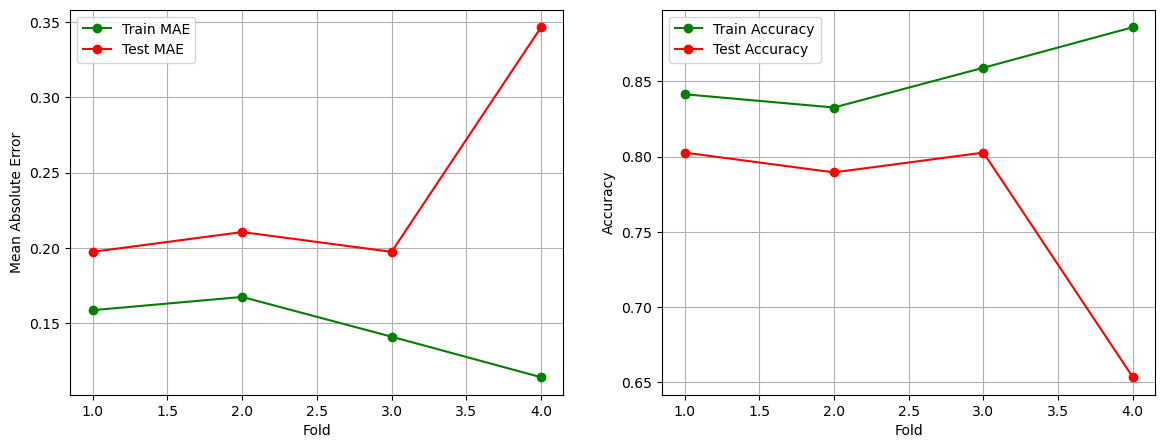

Mean Absolute Error - Train: [0.15859030837004406, 0.16740088105726872, 0.14096916299559473, 0.11403508771929824]
Mean Absolute Error - Test: [0.19736842105263158, 0.21052631578947367, 0.19736842105263158, 0.3466666666666667]
Accuracy - Train: [0.8414096916299559, 0.8325991189427313, 0.8590308370044053, 0.8859649122807017]
Accuracy - Test: [0.8026315789473685, 0.7894736842105263, 0.8026315789473685, 0.6533333333333333]


In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
test_model(model, X,y)



#### Remarqons que : 
en utilisant GaussianNB() on constate une amélioration remarquable des performances.
le MAE de test varie de 0,20 à 0,35 a peu pres.